## The third In-class-exercise (10/06/2022, 40 points in total)

The purpose of this exercise is to understand text representation.

Question 1 (10 points): Describe an interesting text classification or text mining task and explain what kind of features might be useful for you to build the machine learning model. List your features and explain why these features might be helpful. You need to list at least five different types of features.

# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:

I want to understand sentiment towards a product. 
Here, I would like to focus on 'oximeter'. Large amount of people started using it to monitor their health during COVID-19.
 
Now, I wanted to understand which features are useful and what people are thinking about the product. 
 
To start with, I want to focus on a specific manufacturer’s product and perform sentiment analysis on user reviews. The sentiment analysis will give me understanding of users’ feedback and the frequency vector for the data cloud would give me the information on features that the users are reviewing. 
 
For my sentiment analysis on reviews text, I would like to use the POS tagging technique. Parts of speech in the text define the main context, functions, and usage in a sentence. In this method, I am going to label each word on the text corresponding to a particular part of speech based on the definitions and context. 
 
Some of the speech tags that I like to focus on are: 
Nouns, verbs, personal pronouns, Adjective, Adverbs, Coordinating conjunction, Interjections
 
These POS tagged reviews are converted into a matrix of numbers which is given as an input to classifiers. The Classifier will detect the sentiment in the text. 
 
Here is the link for reviews of the product 'Zacurate Pro Series 500DL Fingertip Pulse Oximeter':  https://www.amazon.com/Zacurate-Fingertip-Oximeter-Saturation-Batteries/product-reviews/B07PQ8WTC4/ref=cm_cr_getr_d_paging_btm_next_3?ie=UTF8&reviewerType=all_reviews&pageNumber=3






'''

Question 2 (20 points): Write python code to extract these features you discussed above. You can collect a few sample text data for the feature extraction. 

In [1]:
# You code here (Please add comments in the code):

from bs4 import BeautifulSoup
import requests
import urllib.request
import re
import pandas as pd
Headers = {
    'Access-Control-Allow-Origin': '*',
    'Access-Control-Allow-Methods': 'GET',
    'Access-Control-Allow-Headers': 'Content-Type',
    'Access-Control-Max-Age': '3600',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0',
    'Accept-Language': 'en-US, en;q=0.5'
}

titles = []
text=[]
for pg in range(1,150):
  url = 'https://www.amazon.com/Zacurate-Fingertip-Oximeter-Saturation-Batteries/product-reviews/B07PQ8WTC4/ref=cm_cr_arp_d_paging_btm_next_{str(pg_num)}?ie=UTF8&reviewerType=all_reviews&pageNumber={str(pg_num)}'

  pg = requests.get(url, headers=Headers)
  s = BeautifulSoup(pg.content,'html.parser')
  revw_t = s.find_all('a',class_='review-title-content')
  for i in range(len(revw_t)):
    titles.append(revw_t[i].get_text().strip())
  revw_txt= s.find_all('span',class_='review-text-content')
  for r in range(0,len(revw_txt)):
    text.append(revw_txt[r].get_text().strip()) 
df_revw = pd.DataFrame({
    'Title' : titles,
    'Review': text
})
print(f'Shape of the data frame: {df_revw.shape}')
df_revw.head()

Shape of the data frame: (1490, 2)


,Title,Review
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was..."
1,Great device to have around,I used this device while I was suffering with ...
2,Worked Great,"Rated this product 5 for accuracy, didn't have..."
3,Accurate tool where accuracy is important,This is a good pulse oximeter at a good price....
4,Works as needed and advertised,Hard to comment knowledgably on the accuracy u...


In [2]:
df_revw["preprocessed_review"] = df_revw['Review'].str.replace('[^\w\s]','')
df_revw.head()

C:\Users\maganti\AppData\Local\Temp\ipykernel_28120\1792922926.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_revw["preprocessed_review"] = df_revw['Review'].str.replace('[^\w\s]','')


,Title,Review,preprocessed_review
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was...",In this uncertain Covid era we learned it was ...
1,Great device to have around,I used this device while I was suffering with ...,I used this device while I was suffering with ...
2,Worked Great,"Rated this product 5 for accuracy, didn't have...",Rated this product 5 for accuracy didnt have a...
3,Accurate tool where accuracy is important,This is a good pulse oximeter at a good price....,This is a good pulse oximeter at a good price ...
4,Works as needed and advertised,Hard to comment knowledgably on the accuracy u...,Hard to comment knowledgably on the accuracy u...


In [3]:
df_revw["preprocessed_review"] = df_revw['preprocessed_review'].str.replace('\d+', '')
# remove special characters
import re
df_revw["preprocessed_review"] = df_revw['preprocessed_review'].apply(lambda t : ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', ch) for ch in t))
df_revw.head()

C:\Users\maganti\AppData\Local\Temp\ipykernel_28120\3955160082.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_revw["preprocessed_review"] = df_revw['preprocessed_review'].str.replace('\d+', '')


,Title,Review,preprocessed_review
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was...",In this uncertain Covid era we learned it was ...
1,Great device to have around,I used this device while I was suffering with ...,I used this device while I was suffering with ...
2,Worked Great,"Rated this product 5 for accuracy, didn't have...",Rated this product for accuracy didnt have an...
3,Accurate tool where accuracy is important,This is a good pulse oximeter at a good price....,This is a good pulse oximeter at a good price ...
4,Works as needed and advertised,Hard to comment knowledgably on the accuracy u...,Hard to comment knowledgably on the accuracy u...


In [4]:
df_revw['preprocessed_review'] = df_revw['preprocessed_review'].apply(lambda text: " ".join(word.lower() for word in text.split()))
df_revw.head()

,Title,Review,preprocessed_review
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was...",in this uncertain covid era we learned it was ...
1,Great device to have around,I used this device while I was suffering with ...,i used this device while i was suffering with ...
2,Worked Great,"Rated this product 5 for accuracy, didn't have...",rated this product for accuracy didnt have any...
3,Accurate tool where accuracy is important,This is a good pulse oximeter at a good price....,this is a good pulse oximeter at a good price ...
4,Works as needed and advertised,Hard to comment knowledgably on the accuracy u...,hard to comment knowledgably on the accuracy u...


In [5]:
import nltk
#nltk.download()
from nltk.corpus import stopwords
sw = stopwords.words('english')
df_revw['preprocessed_review'] = df_revw['preprocessed_review'].apply( lambda text : " ".join(w for w in text.split() if w not in sw) )
df_revw.head()

,Title,Review,preprocessed_review
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was...",uncertain covid era learned wise oximeter hand...
1,Great device to have around,I used this device while I was suffering with ...,used device suffering covid terrible bout shor...
2,Worked Great,"Rated this product 5 for accuracy, didn't have...",rated product accuracy didnt anything compare ...
3,Accurate tool where accuracy is important,This is a good pulse oximeter at a good price....,good pulse oximeter good price seem lot cheap ...
4,Works as needed and advertised,Hard to comment knowledgably on the accuracy u...,hard comment knowledgably accuracy get compare...


In [6]:
import nltk
nltk.download('omw-1.4')
from textblob import Word
df_revw['preprocessed_review'] = df_revw['preprocessed_review'].apply( lambda text : " ".join([ Word(i).lemmatize() for i in text.split()]))
df_revw.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\maganti\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Title,Review,preprocessed_review
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was...",uncertain covid era learned wise oximeter hand...
1,Great device to have around,I used this device while I was suffering with ...,used device suffering covid terrible bout shor...
2,Worked Great,"Rated this product 5 for accuracy, didn't have...",rated product accuracy didnt anything compare ...
3,Accurate tool where accuracy is important,This is a good pulse oximeter at a good price....,good pulse oximeter good price seem lot cheap ...
4,Works as needed and advertised,Hard to comment knowledgably on the accuracy u...,hard comment knowledgably accuracy get compare...


In [7]:
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
df_revw['tagged_pos'] = df_revw['preprocessed_review'].str.split().map(pos_tag)
df_revw.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\maganti\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Title,Review,preprocessed_review,tagged_pos
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was...",uncertain covid era learned wise oximeter hand...,"[(uncertain, JJ), (covid, NN), (era, NN), (lea..."
1,Great device to have around,I used this device while I was suffering with ...,used device suffering covid terrible bout shor...,"[(used, VBN), (device, NN), (suffering, VBG), ..."
2,Worked Great,"Rated this product 5 for accuracy, didn't have...",rated product accuracy didnt anything compare ...,"[(rated, VBN), (product, NN), (accuracy, NN), ..."
3,Accurate tool where accuracy is important,This is a good pulse oximeter at a good price....,good pulse oximeter good price seem lot cheap ...,"[(good, JJ), (pulse, NN), (oximeter, RB), (goo..."
4,Works as needed and advertised,Hard to comment knowledgably on the accuracy u...,hard comment knowledgably accuracy get compare...,"[(hard, JJ), (comment, NN), (knowledgably, RB)..."


In [8]:
adjective = []
adverb = []
c_con = []
s_con = []
intj = []
no = []
ve = []
pro = []
pre = []
det= []
def tags(atags):
  for t in atags:
    na= 0
    nad = 0
    ncon= 0
    nsconj = 0
    ninter = 0
    nno = 0
    nve= 0
    nppro= 0
    npredet = 0
    ndet = 0
    for i,j in t:
      if j == 'JJ':
        na =  na + 1
      elif j == 'RB':
        nad = nad + 1
      elif j == 'CC':
        nccon = nccon + 1
      elif j == 'UH':
        ninter = ninter + 1
      elif j == 'NN':
        nno = nno + 1
      elif j == 'VR':
        nve = nve + 1
      elif j == 'PRP':
        nppro = nppro + 1
      elif j == 'PDT':
        npredet = npredet + 1
      elif j == 'DT':
        ndet = ndet + 1
      elif j == 'IN':
        nsconj = nsconj + 1
    
    adjective.append(na)
    adverb.append(nad)
    c_con.append(ncon)
    s_con.append(nsconj)
    intj.append(ninter)
    no.append(nno)
    ve.append(nve)
    pro.append(nppro)
    pre.append(npredet)
    det.append(ndet)
tags(df_revw['tagged_pos'])
df_revw['num of adj'] = adjective
df_revw['num of adverb'] = adverb
df_revw['num of conjunction'] = c_con
df_revw['num of conjuction'] = s_con
df_revw['num of interjection'] = intj
df_revw['num of noun'] = no
df_revw['num of verb'] = ve
df_revw['num of pronoun'] = pro
df_revw['nump of predeterminer'] = pre
df_revw['num of determiner'] = det

df_revw.head()

,Title,Review,preprocessed_review,tagged_pos,num of adj,num of adverb,num of conjunction,num of conjuction,num of interjection,num of noun,num of verb,num of pronoun,nump of predeterminer,num of determiner
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was...",uncertain covid era learned wise oximeter hand...,"[(uncertain, JJ), (covid, NN), (era, NN), (lea...",52,28,0,2,0,90,0,0,0,0
1,Great device to have around,I used this device while I was suffering with ...,used device suffering covid terrible bout shor...,"[(used, VBN), (device, NN), (suffering, VBG), ...",10,5,0,0,0,20,0,0,0,0
2,Worked Great,"Rated this product 5 for accuracy, didn't have...",rated product accuracy didnt anything compare ...,"[(rated, VBN), (product, NN), (accuracy, NN), ...",13,3,0,1,0,22,0,0,0,0
3,Accurate tool where accuracy is important,This is a good pulse oximeter at a good price....,good pulse oximeter good price seem lot cheap ...,"[(good, JJ), (pulse, NN), (oximeter, RB), (goo...",19,3,0,1,0,32,0,0,0,0
4,Works as needed and advertised,Hard to comment knowledgably on the accuracy u...,hard comment knowledgably accuracy get compare...,"[(hard, JJ), (comment, NN), (knowledgably, RB)...",8,1,0,0,0,13,0,0,0,0


Question 3 (10 points): Use any of the feature selection methods mentioned in this paper "Deng, X., Li, Y., Weng, J., & Zhang, J. (2019). Feature selection for text classification: A review. Multimedia Tools & Applications, 78(3)." Select the most important features you extracted above, rank the features based on their importance in the descending order. 

In [9]:
# You code here (Please add comments in the code):
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

num = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_feat = df_revw.select_dtypes(include=num)
print(f'Shape: {num_feat.shape}')
num_feat.head()


Shape: (1490, 10)


,num of adj,num of adverb,num of conjunction,num of conjuction,num of interjection,num of noun,num of verb,num of pronoun,nump of predeterminer,num of determiner
0,52,28,0,2,0,90,0,0,0,0
1,10,5,0,0,0,20,0,0,0,0
2,13,3,0,1,0,22,0,0,0,0
3,19,3,0,1,0,32,0,0,0,0
4,8,1,0,0,0,13,0,0,0,0


In [10]:
a = num_feat
b = df_revw['preprocessed_review']
print(f'SHAPE of X: {a.shape}')
print(f'SHAPE of Y: {b.shape}')


SHAPE of X: (1490, 10)
SHAPE of Y: (1490,)


In [11]:
xt, xte, yt, yte = train_test_split(a, b, test_size=0.2, random_state=60)
xt.shape, xte.shape


((1192, 10), (298, 10))

<AxesSubplot:>

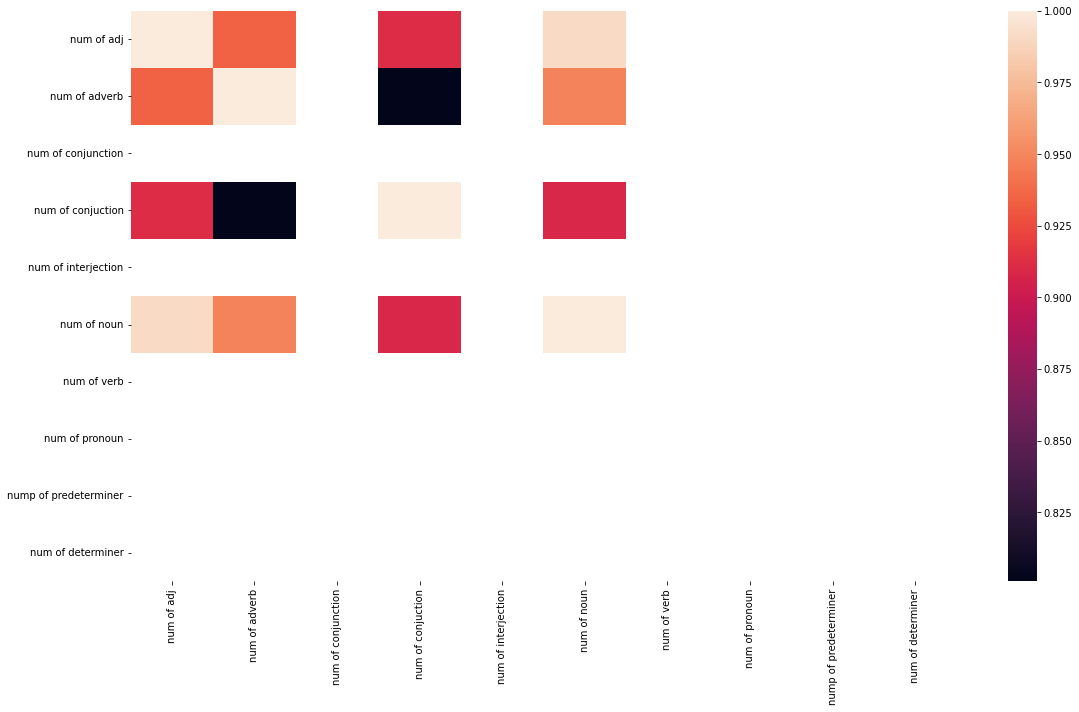

In [12]:
cor = xt.corr()
f, a = plt.subplots()
f.set_size_inches(18.5, 10.5)
sns.heatmap(cor)

In [13]:
def correlated(co, thres):
  col = []
  data = co.corr()
  for r in range(len(data.columns)):
    for c in range(r):
      if (abs(data.iloc[r, c]) > thres):
        col.append(data.columns[r])
  return col


corr = list(set(correlated(xt, 0.5)))
print(f'correlated features are: {set(corr)}')

correlated features are: {'num of noun', 'num of adverb', 'num of conjuction'}


In [14]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=20, random_state=100, max_depth=2)
forest.fit(xt[corr].fillna(0), yt)

RandomForestClassifier(max_depth=2, n_estimators=20, random_state=100)

In [15]:
w = pd.concat([pd.Series(corr), pd.Series(forest.feature_importances_)], axis=1)
w.columns = ['columns', 'weight']
w.sort_values(by='weight', ascending=False)

,columns,weight
0,num of noun,0.431276
2,num of conjuction,0.302841
1,num of adverb,0.265883
